# Satelliteguard

![Vodnjan Logo](assets/vodnjan-logo.png)

## Detekcija nekretnina i obrađenih površina

In [1]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import json
import numpy as np

model = YOLO(os.path.join("models", "satelliteguard-v9.pt"))

with open("coordinates.json", "r") as f:
    coords_dict = json.load(f)

def run_detection(image_name):
    image_path = os.path.join("sample_images", image_name)

    top_left = coords_dict[image_name]["top-left"]
    bottom_right = coords_dict[image_name]["bottom-right"]

    Tx, Ty = top_left
    Bx, By = bottom_right

    print("Koordinate slike:")
    print(f"Tx = {Tx}, Ty = {Ty}")
    print(f"Bx = {Bx}, By = {By}")

    pil_img = Image.open(image_path)
    img_width, img_height = pil_img.size

    # Convert to a NumPy BGR image for OpenCV drawing
    predicted_image_bgr = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

    results = model(image_path, conf=0.4)

    house_index = 0
    land_index = 0

    for result in results:
        boxes = result.boxes.data
        for box in boxes:
            x1, y1, x2, y2, confidence, class_id = box.tolist()
            class_id = int(class_id)

            # Calculate center of the bounding box
            center_x_pix = (x1 + x2) / 2.0
            center_y_pix = (y1 + y2) / 2.0

            # Convert pixel coordinates to map coordinates (HTRS96/TM)
            center_x_map = Tx + (center_x_pix / img_width)  * (Bx - Tx)
            center_y_map = Ty + (center_y_pix / img_height) * (By - Ty)

            if class_id == 0:
                color = (0, 0, 255)
                label = str(house_index)
                house_index += 1
                print(f"Koordinate objekta {label}: ({center_x_map:.2f}, {center_y_map:.2f})")
            else:
                color = (255, 0, 0)
                label = f"{land_index}"
                land_index += 1
                print(f"Koordinate površine {label}: ({center_x_map:.2f}, {center_y_map:.2f})")

            # Draw dot
            cv2.circle(
                predicted_image_bgr,
                (int(center_x_pix), int(center_y_pix)),
                radius=5,
                color=color,
                thickness=-1
            )

            # Draw house number
            cv2.putText(
                predicted_image_bgr,
                label,
                (int(center_x_pix), int(center_y_pix) - 10), # slightly above the dot
                cv2.FONT_HERSHEY_SIMPLEX,
                1.0, # font scale
                color, # text color (Red)
                2, # line thickness
                cv2.LINE_AA
            )

    # Convert back to RGB for display
    predicted_image_rgb = cv2.cvtColor(predicted_image_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(20, 10))
    plt.imshow(predicted_image_rgb)
    plt.axis('off')

    legend_patches = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="House"),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="Land"),
    ]
    plt.legend(handles=legend_patches, loc="upper left")

    plt.show()

Koordinate slike:
Tx = 291083.58, Ty = 4984222.26
Bx = 291564.66, By = 4983991.71

image 1/1 c:\Users\josip\Documents\GitHub\edih-adria\vodnjan-satelliteguard\sample_images\slika_1.png: 320x640 19 houses, 6 lands, 302.9ms
Speed: 6.3ms preprocess, 302.9ms inference, 15.3ms postprocess per image at shape (1, 3, 320, 640)
Koordinate objekta 0: (291365.62, 4984137.54)
Koordinate objekta 1: (291383.15, 4984003.05)
Koordinate objekta 2: (291413.07, 4984143.95)
Koordinate objekta 3: (291346.52, 4984129.98)
Koordinate objekta 4: (291359.63, 4984202.39)
Koordinate površine 0: (291536.31, 4984168.16)
Koordinate objekta 5: (291224.30, 4984187.86)
Koordinate objekta 6: (291421.99, 4984033.22)
Koordinate objekta 7: (291428.46, 4984012.45)
Koordinate objekta 8: (291405.10, 4984206.98)
Koordinate objekta 9: (291350.39, 4984093.50)
Koordinate objekta 10: (291419.45, 4984065.24)
Koordinate objekta 11: (291372.80, 4984027.09)
Koordinate površine 1: (291121.17, 4984108.28)
Koordinate objekta 12: (291305.

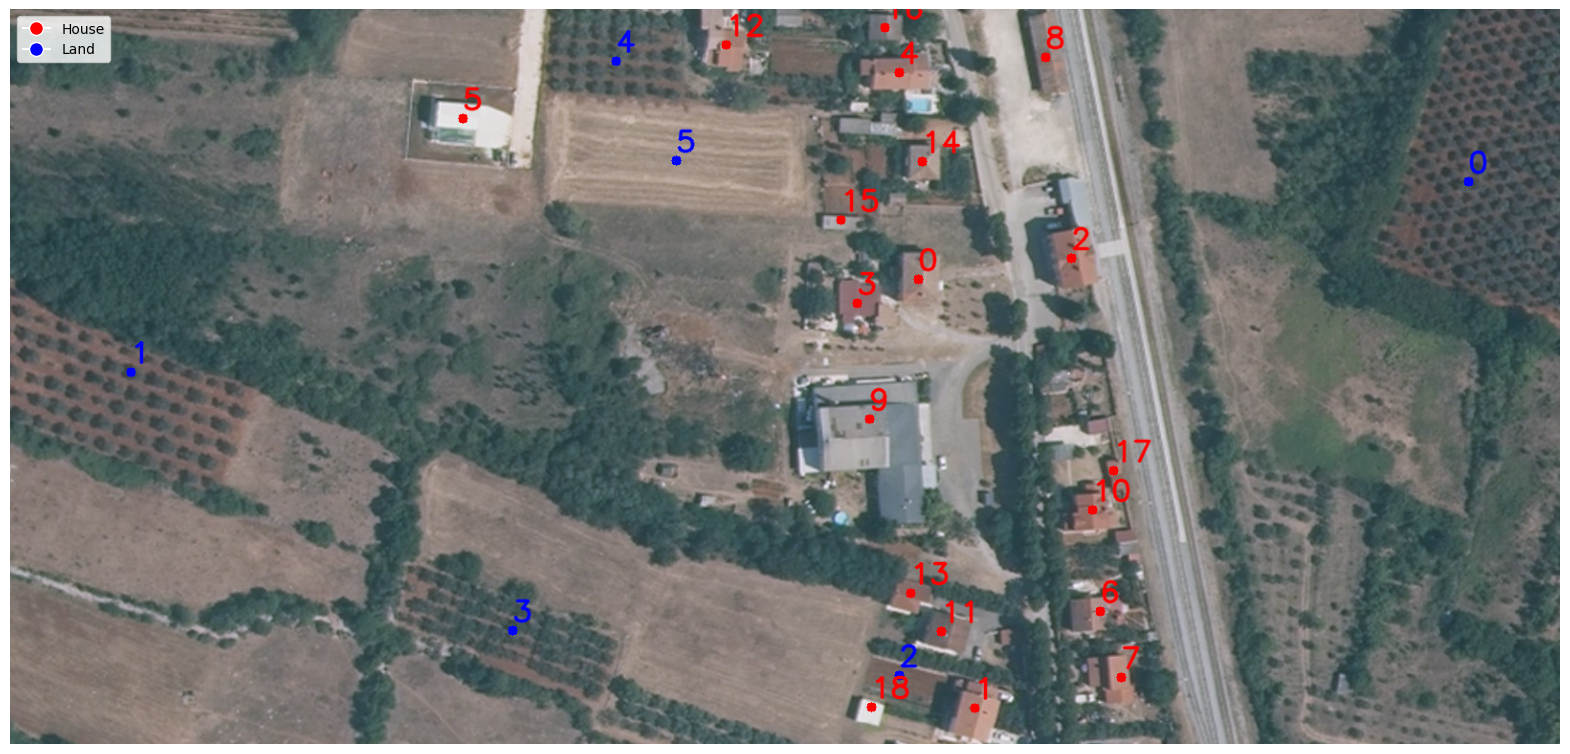

Koordinate slike:
Tx = 291451.17, Ty = 4984002.59
Bx = 291938.51, By = 4983769.36

image 1/1 c:\Users\josip\Documents\GitHub\edih-adria\vodnjan-satelliteguard\sample_images\slika_2.png: 320x640 25 houses, 12 lands, 203.6ms
Speed: 1.6ms preprocess, 203.6ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Koordinate objekta 0: (291569.61, 4983791.25)
Koordinate objekta 1: (291931.31, 4983804.99)
Koordinate objekta 2: (291591.38, 4983829.45)
Koordinate objekta 3: (291536.86, 4983785.75)
Koordinate površine 0: (291518.78, 4983934.96)
Koordinate površine 1: (291519.52, 4983825.75)
Koordinate objekta 4: (291459.27, 4983937.60)
Koordinate objekta 5: (291785.54, 4983805.27)
Koordinate objekta 6: (291875.18, 4983800.32)
Koordinate objekta 7: (291737.55, 4983776.93)
Koordinate objekta 8: (291912.73, 4983809.15)
Koordinate objekta 9: (291741.09, 4983798.74)
Koordinate objekta 10: (291710.86, 4983789.26)
Koordinate površine 2: (291863.09, 4983898.99)
Koordinate objekta 11: (291677.

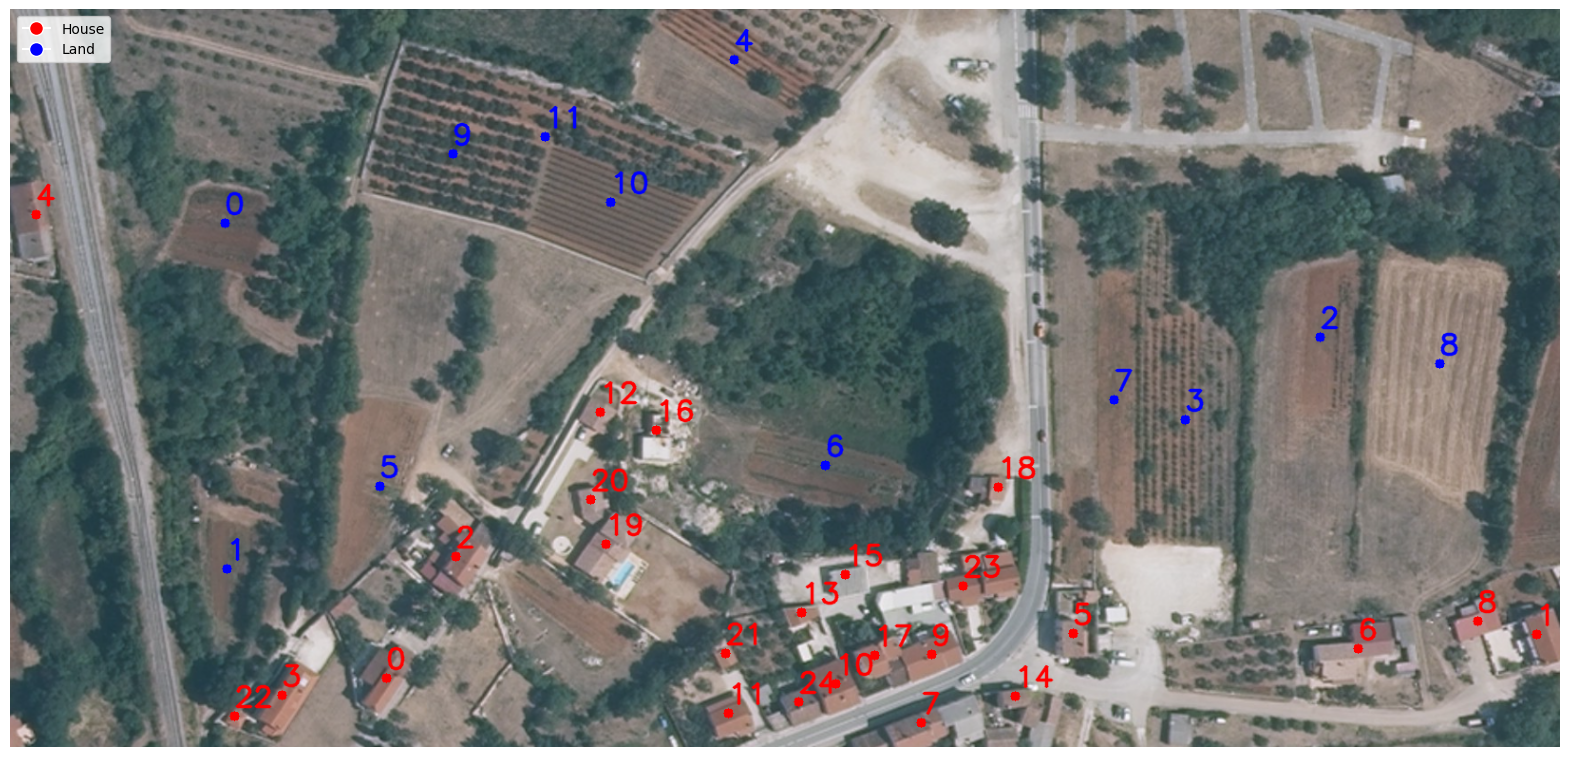

Koordinate slike:
Tx = 291299.51, Ty = 4983468.81
Bx = 291786.84, By = 4983235.88

image 1/1 c:\Users\josip\Documents\GitHub\edih-adria\vodnjan-satelliteguard\sample_images\slika_3.png: 320x640 25 houses, 3 lands, 176.2ms
Speed: 2.3ms preprocess, 176.2ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)
Koordinate objekta 0: (291564.09, 4983357.43)
Koordinate objekta 1: (291462.08, 4983265.27)
Koordinate površine 0: (291701.82, 4983410.75)
Koordinate objekta 2: (291485.65, 4983331.35)
Koordinate objekta 3: (291387.99, 4983405.08)
Koordinate objekta 4: (291373.17, 4983338.34)
Koordinate objekta 5: (291520.29, 4983311.37)
Koordinate objekta 6: (291605.76, 4983246.79)
Koordinate objekta 7: (291436.58, 4983322.91)
Koordinate objekta 8: (291460.45, 4983305.06)
Koordinate objekta 9: (291540.44, 4983413.56)
Koordinate objekta 10: (291312.46, 4983455.81)
Koordinate objekta 11: (291483.18, 4983300.73)
Koordinate objekta 12: (291397.17, 4983286.05)
Koordinate objekta 13: (291335.6

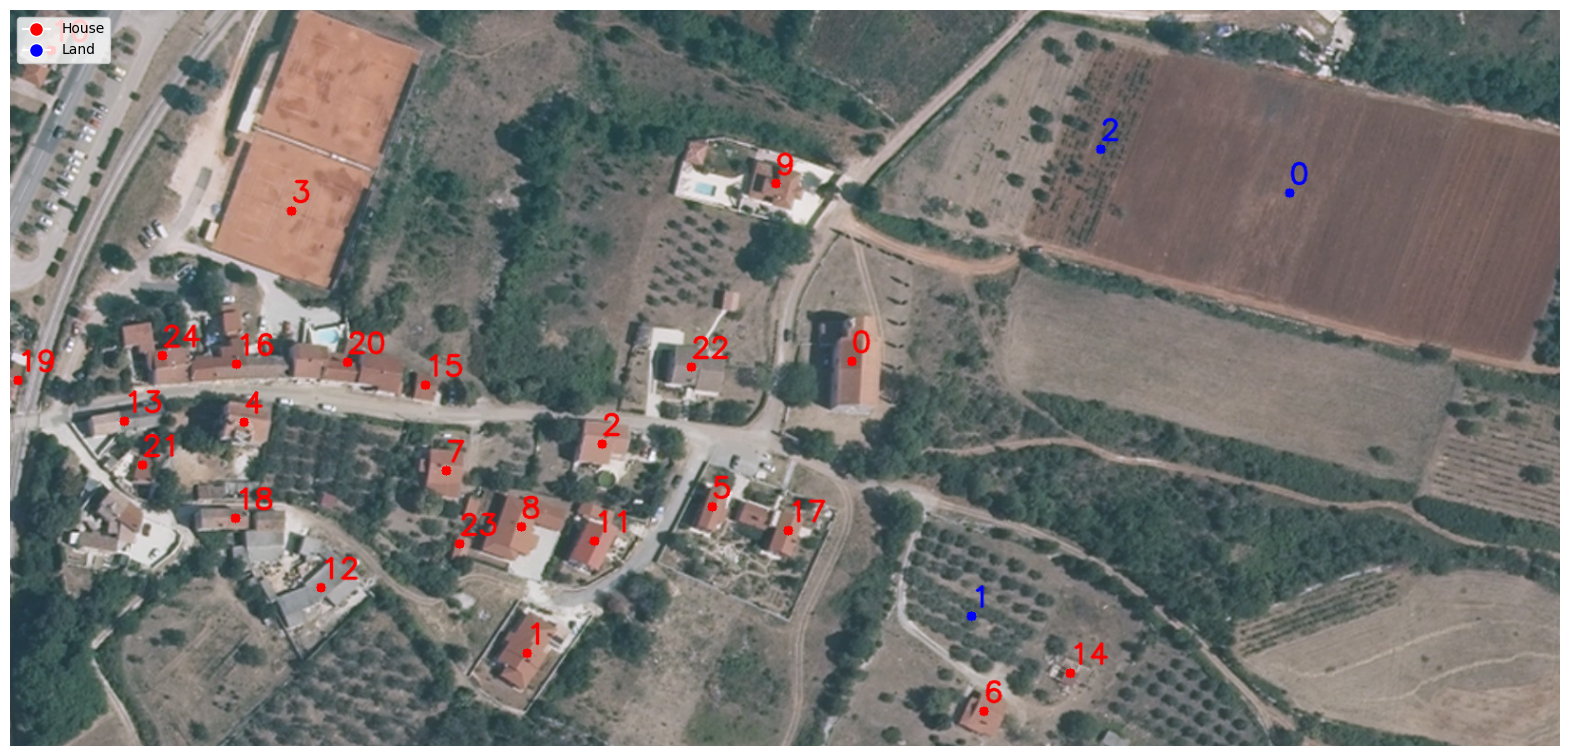

In [2]:
run_detection("slika_1.png")
run_detection("slika_2.png")
run_detection("slika_3.png")

## Detekcija deponija otpada

In [98]:
import os
from google import genai
from google.genai import types
from dotenv import load_dotenv
from io import BytesIO

load_dotenv()

def detect_dumpsite(image_path):
    im = Image.open(BytesIO(open(image_path, "rb").read()))

    plt.figure(figsize=(8, 8))
    plt.imshow(im)
    plt.axis("off")
    plt.show()

    client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])

    PROMPT = "Does this image contain an illegal dumpsite?"

    response = client.models.generate_content(
        model="gemini-2.0-flash",
        config=types.GenerateContentConfig(
            system_instruction="Return a JSON object with the key 'result' and a boolean value true or false.",
            temperature=0.1,
            response_mime_type="application/json"
        ),
        contents=[PROMPT, im])

    return json.loads(response.text)["result"]

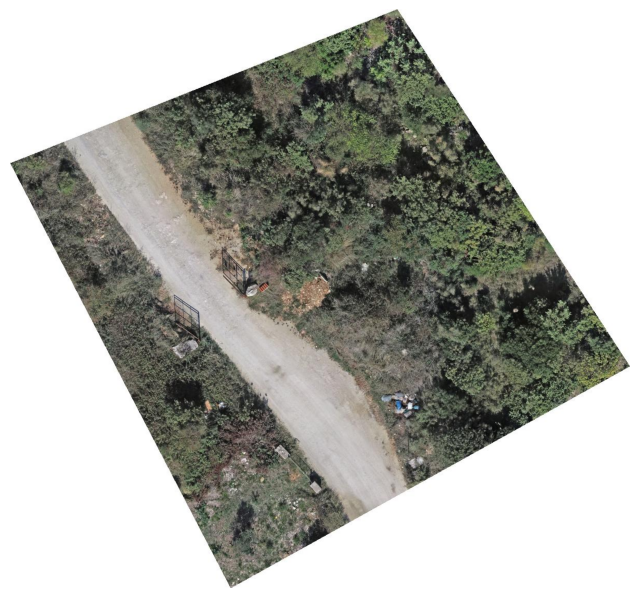

True

In [99]:
detect_dumpsite(os.path.join("sample_images", "vodnjan_kamenolom.jpg"))

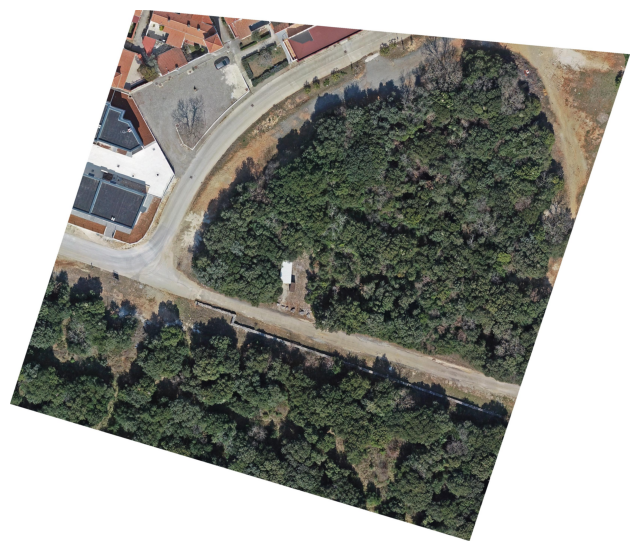

False

In [100]:
detect_dumpsite(os.path.join("sample_images", "barbariga.jpg"))